### Como utilizar ML com Dados Não Estruturais Textuais?

* Técnicas de NLP preprocessam os dados para filtrarmos o que é mais relevante para a classificação 

![Title](../imgs/nlp-illustration.png)


* A tokenização nos auxilia a dividir strings em palavras
* Essas palavras serão as "features" que serão utilizadas para aprendizado de um modelo de Machine Learning
* Um algoritmo de Machine Learning só entende números (atributos sempre numéricos), sendo assim, após a tokenização, precisamos converter nossas palavras para valores numéricos
* O processo de transformação textual para base numérico denomina-se **bag of words**

![Title](../imgs/1-Bag-of-words.png)

### Técnicas de BOW

Existem diferentes formas de converter um dataset textual para números, destacando-se:
* CountVectorizer
* TF-IDF
* Word Embeddings

#### Count Vectorizer

- Pegue uma frase do corpus;
- Crie um vetor N-dimensional de inteiros (onde N é o número de palavras do vocabulário);
- Cada componente do vetor corresponde a uma palavra do vocabulário, segundo a ordem que as palavras aparecem no vocabulário.
- Preencha esse vetor com zeros (todas suas componentes serão 0);
- Para cada palavra da frase, mude a componente correspondente do vetor para 1;
- Faça isso para todas as frases do corpus;

 Objetivo: construir uma tabela de vocabulário que represente o seu Corpus, semelhante ao one-hot-encoder ou get-dummies

Exemplo:

Na frase: 

In [2]:
["Gosto de aprender Data Science","mas não gosto de estudar estatística", "pois é difícil de aprender."]

['Gosto de aprender Data Science',
 'mas não gosto de estudar estatística',
 'pois é difícil de aprender.']

Podemos preprocessá-la como visto anteriormente, gerando, por exemplo, a saída abaixo

In [4]:
["gostar aprender data science",
 "mas nao gostar estudar estatística",
 "pois ser difícil aprender."]

['gostar aprender data science',
 'mas nao gostar estudar estatística',
 'pois ser difícil aprender.']

Se fizermos a tokenização e pegarmos as palavras únicas resultantes, teremos o nosso vocabulário

In [6]:
vocab = ['aprender', 'data', 'difícil', 'estatística', 'estudar', 'gostar', 'mas', 'nao', 'pois', 'science', 'ser']
vocab

['aprender',
 'data',
 'difícil',
 'estatística',
 'estudar',
 'gostar',
 'mas',
 'nao',
 'pois',
 'science',
 'ser']

Dado o vocabulário, podemos percorrer cada uma das nossas sentenças e contar a frequência de palavras do vocabulário, gerando os vetores abaixo:

* "Gosto de aprender Data Science" --> [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]

* "mas não gosto de estudar estatística" --> [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]

* "pois é difícil de aprender" --> [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import classification_report
from nltk import pos_tag
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.ensemble import RandomForestClassifier

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
# Instancia o PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cecilia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cecilia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
movies = pd.read_csv('movies.csv', index_col=0)
movies_sample = movies.sample(frac=0.1, replace=False)

In [4]:
def preprocessing(string):
    ###
    # Remove acentuações
    string = unidecode(string)
    ###
    # Deixa apenas elementos alfanuméricos
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # deixa todas as palavras minúsculas
    string = string.lower()
    ###
    # tokenização
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    ###
    # Aplica o Stemming
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    ###
    # Retorna a lista de palavras pré-processadas
    return stem_words

In [5]:
# Aplica o preprocessing nas críticas de filmes
movies_sample["filtered_words"] = movies_sample['text'].apply(lambda x: preprocessing(x))

# Normalmente, depois do processamento juntamos as palavras novamente em uma só string
movies_sample['join_words'] = movies_sample['filtered_words'].apply(lambda x: ' '.join(x))

In [6]:
# Separa os dados em X e Y
X = movies_sample['join_words']
y = movies_sample['label']

# Carrega o train_test_split para separar a base em treino e teste
from sklearn.model_selection import train_test_split

# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.3,
                                                     random_state = 42)

In [26]:
# Carrega a função CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# instancia o transformador
cv = CountVectorizer()

# Transforma os dados nas matrizes de saída
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [30]:
df_cv = pd.DataFrame(X_train_cv, columns=cv.get_feature_names())

In [37]:
df_cv

,00,000,007,00am,01,01pm,02,05,06,08,...,zsigmond,zucco,zue,zulu,zuniga,zurer,zuzz,zwart,zwick,zzzzip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

* O Count Vectorizer apesar de eficiente em seu objetivo principal (transformar a base em números), faz com que todas as palavras tenham igual relevância no Corpus, uma vez que sua saída é binária (0 - a palavra não existe na frase e 1 caso exista)
* Em texto é esperado que uma palavra seja mais relevante do que outra ao longo da sentença
* O TF-IDF é uma alternativa criada com o objetivo de mostrar tal relevância
* Composto por duas partes principais: Term Frequency (TF) e Inverse Document Frequency (IDF)
  * TF - Term Frequency: é a frequência de vezes que um termo/palavra aparece em cada um dos documentos analisados, ajudando assim a avaliar a relevância daquela palavra; 
  * IDF - Inverse Document Frequency: é a frequência de documentos que um termo/palavra aparece, de forma que ajude a entender a influência daquele determinado termo/palavra nos textos.

#### Como assim IDF?

![Title](../imgs/fine.jpg)

### Exemplo

Digamos que tenhamos que classificar tipos de esporte a partir de textos. Se contarmos apenas as frequências de cada palavra ao longo do texto (TF), teremos algumas palavras bem frequentes como:
* Esporte
* Bola
* Jogo
* Jogadores
* Campo
Essas palavras vão aparecer em muitas sentenças, elas servem apra identificar o tema geral do texto (esporte), mas não ajusta a identificar qual o esporte
* Se tivermos entretanto uma palavra como "acrobacia", essa palavra pode ter frequência baixa se analisarmos ao todo (TF), mas ela será bem mais relevante do que "esporte" para identificar o tipo de esporte (ginástica) nos textos referentes a ginástica (IDF alto)

Com isso podemos fazer uma relação entre o TF e o IDF de forma a gerar a frequência final daquela frase

<img src="https://www.researchgate.net/profile/Haider-Al-Khateeb/publication/291950178/figure/fig1/AS:330186932408324@1455734107458/Term-Frequency-Inverse-Document-Frequency-TF-IDF.png" width=800>

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instancia o transformador
tfidf = TfidfVectorizer(use_idf = True)

# Transforma os dados nas matrizes de saída
X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()

In [12]:
X_train_tfidf

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.06814878, 0.05611685, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

#### Aplicando em algoritmos de ML

In [13]:
feature_names = tfidf.get_feature_names()
denselist = X_train_tfidf.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)

In [14]:
df_tfidf

,00,000,007,00am,01,01pm,02,05,06,08,...,zsigmond,zucco,zue,zulu,zuniga,zurer,zuzz,zwart,zwick,zzzzip
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,0.068149,0.056117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3498,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
rf = RandomForestClassifier()
model = rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       764
           1       0.81      0.79      0.80       736

    accuracy                           0.80      1500
   macro avg       0.80      0.80      0.80      1500
weighted avg       0.80      0.80      0.80      1500



### Comparando as duas técnicas

<AxesSubplot:ylabel='Count'>

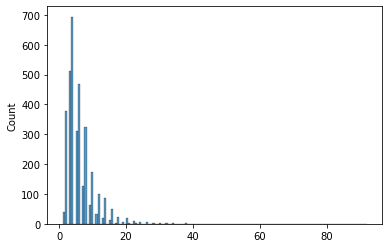

In [21]:
sns.histplot(X_train_cv.max(axis=1))

<AxesSubplot:ylabel='Count'>

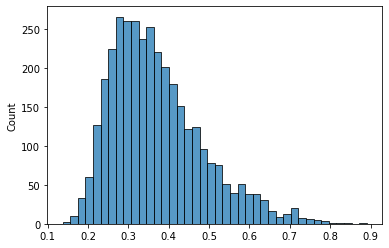

In [22]:
sns.histplot(pd.DataFrame(X_train_tfidf).max(axis=1))

#### Exercício - Detecção de Spam

1. Faça a leitura de um dataset de spam
2. Preprocesse a base com as técnicas de NLP que julgar necessárias
3. Utilize as duas técnicas de bag of words para gerar o seu dataset numérico
4. Treine um classificador de sua escolha
5. Avalie os resultados do algoritmo 